In [2]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, LSTM, Dropout
import pandas as pd
import numpy as np
import itertools as it
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("inputdataset_final.csv")
print( df.shape ) # (164009, 11)
# df.head()

(164009, 11)


In [4]:
df = df[8:] # 짝수로 숫자 맞추기 위해 앞의 8개 빼기

In [5]:
df['premium'].isnull().sum() # 1개의 결측치가 있음!

1

In [6]:
df = df[pd.notnull(df['premium'])] # 1개의 결측치 삭제

In [6]:
# pandas.core.series.Series > numpy.ndarray > list
premium = df['premium'].values.tolist()

print(type(premium)) # <class 'list'>
print(len(premium)) # 164000

<class 'list'>
164000


In [7]:
window_size = 500
X = []
Y = []
print('len(premium) - window_size=',  len(premium) - window_size ) # len(premium) - window_size= 163995
for i in range(len(premium) - window_size):
    # i = 0
    # j = 0, 1, 2, 3, 4
    X.append([premium[i+j] for j in range(window_size)])
    Y.append(premium[window_size+i])

NameError: name 'premium' is not defined

In [8]:
X = np.array(X)
Y = np.array(Y)

print( X.shape ) # (163995, 5)
print( Y.shape ) # (163995,)

print( X )
print( Y )

(163995, 5)
(163995,)
[[-2.13839937 -3.16269097 -2.6888462  -2.79617532 -2.20012508]
 [-3.16269097 -2.6888462  -2.79617532 -2.20012508 -4.20481956]
 [-2.6888462  -2.79617532 -2.20012508 -4.20481956 -2.21160953]
 ..., 
 [ 4.22055872  3.74092331  3.79483348  4.1785208   4.32652833]
 [ 3.74092331  3.79483348  4.1785208   4.32652833  4.13582023]
 [ 3.79483348  4.1785208   4.32652833  4.13582023  4.09228536]]
[-4.20481956 -2.21160953  0.50605839 ...,  4.13582023  4.09228536
  4.07444284]


In [9]:
train_test_split = 160000

X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

print( "X_train.shape=", X_train.shape ) # X_train.shape= (160000, 5)
print( "X_test.shape=", X_test.shape )   # X_test.shape= (3995, 5)
print( "Y_train.shape=", Y_train.shape ) # Y_train.shape= (160000,)
print( "Y_test.shape=", Y_test.shape )   # Y_test.shape= (3995,)

print( X_train[0] )
print( X_test[0] )
print( Y_train[0] )
print( Y_test[0] )

X_train.shape= (160000, 5)
X_test.shape= (3995, 5)
Y_train.shape= (160000,)
Y_test.shape= (3995,)
[-2.13839937 -3.16269097 -2.6888462  -2.79617532 -2.20012508]
[ 4.10178427  4.19536531  4.4616269   4.58808303  4.20337184]
-4.204819561
4.275252204


In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test  = np.reshape(X_test, (X_test.shape[0], window_size, 1))

print( "X_train.shape=", X_train.shape ) # X_train.shape= (160000, 5, 1)
print( "X_test.shape=", X_test.shape )   # X_test.shape= (3995, 5, 1)
print( "Y_train.shape=", Y_train.shape ) # Y_train.shape= (160000,)
print( "Y_test.shape=", Y_test.shape )   # Y_test.shape= (3995,)
print( X_train[0] )
print( X_test[0] )

X_train.shape= (160000, 5, 1)
X_test.shape= (3995, 5, 1)
Y_train.shape= (160000,)
Y_test.shape= (3995,)
[[-2.13839937]
 [-3.16269097]
 [-2.6888462 ]
 [-2.79617532]
 [-2.20012508]]
[[ 4.10178427]
 [ 4.19536531]
 [ 4.4616269 ]
 [ 4.58808303]
 [ 4.20337184]]


In [11]:
model = Sequential()
model.add(LSTM(128, input_shape=(5,1,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [12]:
import time
start_time = time.time() 

hist = model.fit(X_train, Y_train, epochs=1, validation_split=0.1)
# hist = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)
# hist = model.fit(X_train, Y_train, epochs=6, batch_size=1, validation_split=0.1)
print(hist.history)

lap = (time.time() - start_time)
m, s = divmod(lap, 60)
h, m = divmod(m, 60)
print( "%d:%02d:%02d" % (h, m, s) )  # 예) 1번=0:00:59, 10번=0:09:38

Train on 144000 samples, validate on 16000 samples
Epoch 1/1
144000/144000 [==============================] - 19s 132us/step - loss: 1.3295 - val_loss: 0.2338
{'val_loss': [0.23379203138500451], 'loss': [1.3295029574889277]}
0:00:19


In [13]:
score = model.evaluate(X_train, Y_train)
score

160000/160000 [==============================] - 5s 31us/step


0.27134545916886998

In [14]:
score2 = model.evaluate(X_test, Y_test)
score2

3995/3995 [==============================] - 0s 43us/step


0.054209656114497677

In [22]:
train_predict = model.predict(X_train)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(X_test.shape) # (3995, 5, 1)
print(Y_test.shape) # (3995,)
print(Y_test[0]) # 4.2752522040000001
print(y_pred[0]) # array([ 4.23595238], dtype=float32)

(3995, 5, 1)
(3995,)
4.275252204
[ 4.03264141]


In [17]:
mean_squared_error(Y_test, y_pred)

0.054209657580034619

In [18]:
Y_test

array([ 4.2752522 ,  4.36852771,  4.49955848, ...,  4.13582023,
        4.09228536,  4.07444284])

In [19]:
y_pred

array([[ 4.03264141],
       [ 4.09383345],
       [ 4.20239735],
       ..., 
       [ 4.15193748],
       [ 3.95727634],
       [ 3.91632962]], dtype=float32)

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['NanumBarunGothicOTF'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


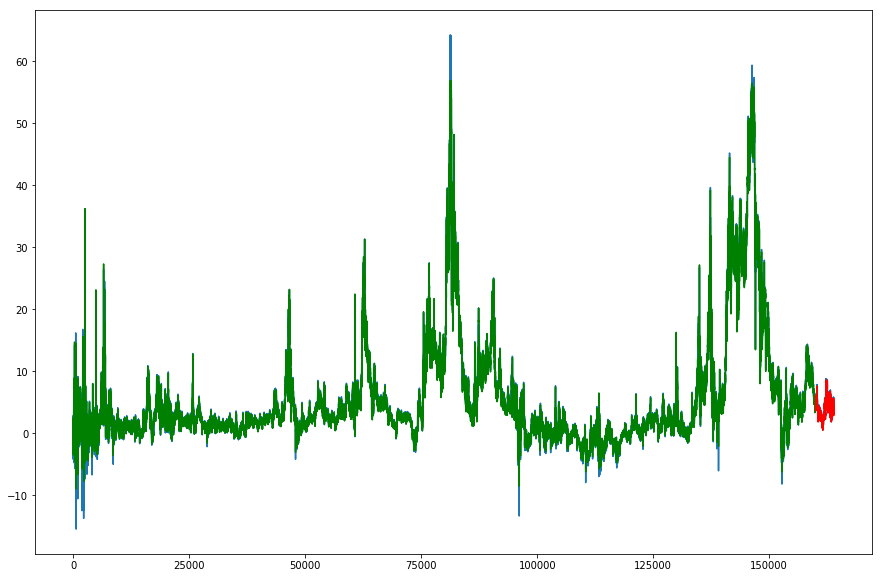

In [23]:
plt.figure(figsize=(15,10))
plt.plot(premium)

split_pt = train_test_split+window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g')

plt.plot(np.arange(split_pt, split_pt+len(y_pred), 1), y_pred, color='r')

In [19]:
# end